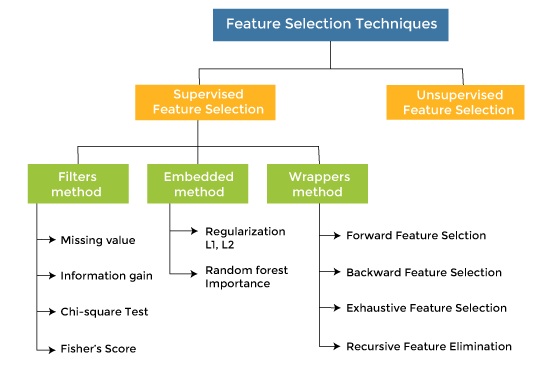

**Intro**:

Feature selection techniques are an important part of data preparation part and are useful in many ways:
1. Reduce Model Complexity.
2. Reduce Model training time.
3. Avoids Multicollinearity issue among different features.
4. Makes the model easier to interpret and explainable as well.
5. Reduces the Curse of Dimensionality problem.
6. Improves model's performance in many cases.
7. Reduces overfitting problem in some cases.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/Breast_Cancer.csv
/kaggle/input/breast-cancer-dataset/breast-cancer.csv


In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# check for missing values in the data

df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
# shape of the dataframe

df.shape

(569, 32)

The `Unnamed: 32` column contains all the missing values and has to be removed.

In [5]:
# remove the column containing missing values
df.dropna(axis=1,inplace=True)

In [6]:
# shape of dataframe after removing the column
df.shape

(569, 32)

In [7]:
# get the info of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# drop the id column from the dataframe
df.drop(columns=['id'],inplace=True)

In [9]:
# make X and y
X = df.drop(columns='diagnosis')
y = df['diagnosis']

## Filter based methods:

The filter based methods select the features given some particular criteria or a hypothesis test.   
Does not rely upon any ML algorithm to do feature election.

#### Variance Threshold technique:

Variance threshold technique removes the features from the data that have variances below the given threshold value.

In [10]:
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(threshold=10)

print('The number of columns in the data before the transformation are ',X.shape[1])

X1 = var.fit_transform(X,y)

print('The number of columns in the data after the transformation are ',X1.shape[1])

print('The column indexes that were dropped ',var.get_support(indices=True))

The number of columns in the data before the transformation are  30
The number of columns in the data after the transformation are  9
The column indexes that were dropped  [ 0  1  2  3 13 20 21 22 23]


In [11]:
# reduce the threshold to 2

var = VarianceThreshold(threshold=2)

print('The number of columns in the data before the transformation are ',X.shape[1])

X1 = var.fit_transform(X,y)

print('The number of columns in the data after the transformation are ',X1.shape[1])

print('The column indexes that were selected ',var.get_support(indices=True))

print('The variances of different columns')

var.variances_

The number of columns in the data before the transformation are  30
The number of columns in the data after the transformation are  10
The column indexes that were selected  [ 0  1  2  3 12 13 20 21 22 23]
The variances of different columns


array([1.23970943e+01, 1.84663974e+01, 5.89402799e+02, 1.23625903e+05,
       1.97452073e-04, 2.78428549e-03, 6.34407875e-03, 1.50301462e-03,
       7.50222008e-04, 4.97611152e-05, 7.67671984e-02, 3.03781123e-01,
       4.08071149e+00, 2.06579462e+03, 8.99927022e-06, 3.20139261e-04,
       9.09596835e-04, 3.80055080e-05, 6.82128053e-05, 6.98938631e-06,
       2.33191693e+01, 3.77100918e+01, 1.12714643e+03, 3.23597671e+05,
       5.20403629e-04, 2.47112650e-02, 4.34475982e-02, 4.31314711e-03,
       3.82085668e-03, 3.25636075e-04])

#### Feature Selector based on a statistical test:
The K Best features can be selected from the data by running a statistical test on the columns of the data and choosing the features upto K best statistical values.

1. Chi-Square test. (cat-cat variables)
2. ANOVA test. (cat-continuous variables)
3. Mutual Information test. (cat-continuous variables)

**Our Data only contains numerical columns and the target column is only categorical so we will use the ANOVA technique to filter out the K best features from the data.**

In [12]:
from sklearn.feature_selection import SelectPercentile,SelectKBest
from sklearn.feature_selection import f_classif

#### Select kbest:

Selects the K best number of features from the data based on the input statistics.    
The higher the value of the statistic features are given more priority.

In [13]:
kbest = SelectKBest(score_func=f_classif,k=5)

print('The number of columns in the data before the transformation are ',X.shape[1])

X2 = kbest.fit_transform(X,y)

print('The number of columns in the data after the transformation are ',X2.shape[1])

print('The column indexes that were selected',kbest.get_support(indices=True))

print('The results of Select K best are')

pd.DataFrame(data=[kbest.scores_,kbest.pvalues_,np.arange(0,30,1).astype(int)],
            columns=X.columns,
            index=['Statistics','p_value','index']).T.sort_values(by='Statistics',ascending=False)

The number of columns in the data before the transformation are  30
The number of columns in the data after the transformation are  5
The column indexes that were selected [ 2  7 20 22 27]
The results of Select K best are


,Statistics,p_value,index
concave points_worst,964.385393,1.969100e-124,27.0
perimeter_worst,897.944219,5.771397e-119,22.0
concave points_mean,861.676020,7.101150e-116,7.0
radius_worst,860.781707,8.482292e-116,20.0
perimeter_mean,697.235272,8.436251e-101,2.0
area_worst,661.600206,2.828848e-97,23.0
radius_mean,646.981021,8.465941e-96,0.0
area_mean,573.060747,4.734564e-88,3.0
concavity_mean,533.793126,9.966556e-84,6.0
concavity_worst,436.691939,2.464664e-72,26.0


#### Select K percentile

Select percentile is same as Select K best.      
The only difference here is that the value of K is not an integer but a percentile value.          
This means that K percentile amount of features are selected based on the statistic of the chosen function.

In [14]:
kper = SelectPercentile(score_func=f_classif,percentile=30)

print('The number of columns in the data before the transformation are ',X.shape[1])

X3 = kper.fit_transform(X,y)

print('The number of columns in the data after the transformation are ',X3.shape[1])

print('The column indexes that were selected',kper.get_support(indices=True))

print('The results of Select Percentile are')

pd.DataFrame(data=[kper.scores_,kper.pvalues_,np.arange(0,30,1).astype(int)],
            columns=X.columns,
            index=['Statistics','p_value','index']).T.sort_values(by='Statistics',ascending=False)

The number of columns in the data before the transformation are  30
The number of columns in the data after the transformation are  9
The column indexes that were selected [ 0  2  3  6  7 20 22 23 27]
The results of Select Percentile are


,Statistics,p_value,index
concave points_worst,964.385393,1.969100e-124,27.0
perimeter_worst,897.944219,5.771397e-119,22.0
concave points_mean,861.676020,7.101150e-116,7.0
radius_worst,860.781707,8.482292e-116,20.0
perimeter_mean,697.235272,8.436251e-101,2.0
area_worst,661.600206,2.828848e-97,23.0
radius_mean,646.981021,8.465941e-96,0.0
area_mean,573.060747,4.734564e-88,3.0
concavity_mean,533.793126,9.966556e-84,6.0
concavity_worst,436.691939,2.464664e-72,26.0


#### Correlation:
The correlation is calculated between numerical - numerical columns.
- The correlation coef of 0 indicates that there is no linear relationship between the features.
- The correlation coef of +1 indicates that there is a strong positive linear relationship between the features.
- The correlation coef of -1 indicates that there is a strong negative linear relationship between the features.

**The correlation coef value ranges between -1 to 1 and this value also signifies the strength of the correlation**.

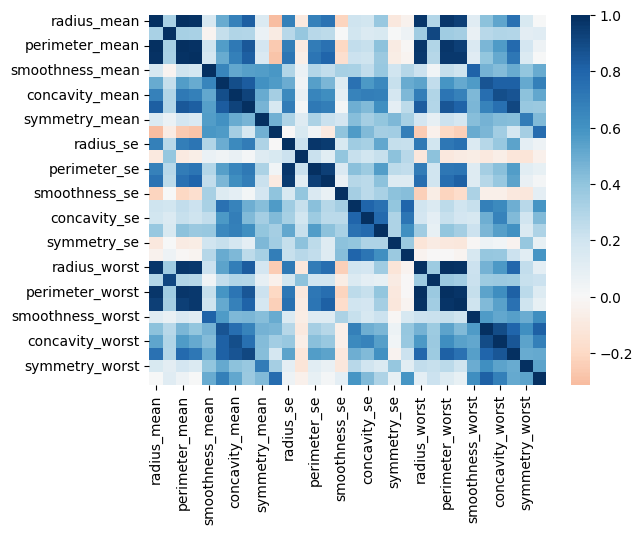

In [15]:
# Correlation matrix

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(X.corr(),center=0,cmap='RdBu')
plt.show()

- The Blue shaded features are all positively correlated to each other.
- All Red shaded features show a negative correlation with each other.

## Wrapper Based methods

Wrapper based methods for feature slection do the feature selection recursively by adding or removing features and checking the scores after each iteration.   
The features that gives the best scores are selected.

Types:
1. **Backward Elimination** - Start with all the features and then iteratively remove features one by one to get the best scores for n number of features.
2. **Forward Elimination** - Start with no features and iteratively add one feature at a time to select the best score with n number of features.

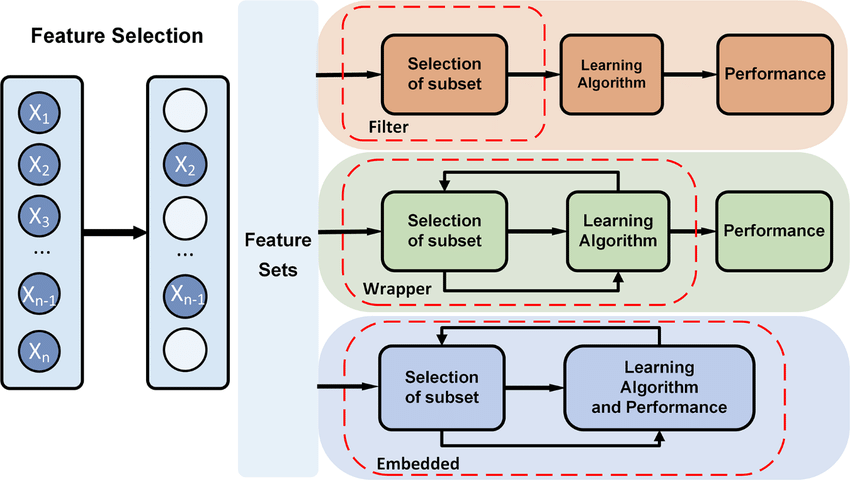

#### Recursive Feature Elimination (RFE):

The RFE methods is used to rank features based on the highest scores and it recursively eleiminates the features to find the best set of features that give the highest score for that current model.

- The RFE technique selects features based on the estimator/model used for the task.
- If a regression model is selected then the RFE chooses features with the highest **coef value** / Features that have the highest impact in predicting the target, rank the features after each iteration and eliminate those with the lowest rank and the model is applied on the new set of features again and again until the desired number of features are selected.
- If a tree based classification model is selected then the RFE chooses features with the highest **Feature Importance** value , rank the features after each iteration and eliminate those with the lowest rank and the model is applied on the new set of features again and again until the desired number of features are selected.

In [16]:
from sklearn.feature_selection import RFE,RFECV
from sklearn.ensemble import RandomForestClassifier

# rfe in case of a classification problem
rf = RandomForestClassifier()

rfe = RFE(estimator=rf,n_features_to_select=15)

print('The number of columns in the data before the transformation are ',X.shape[1])

X4 = rfe.fit_transform(X,y)

print('The number of columns in the data after the transformation are ',X4.shape[1])

print('The column indexes that were selected ',rfe.get_support(indices=True))

# dataframe ranking the features (all selected features are assigned rank 1)

feature_rank = rfe.ranking_

pd.DataFrame(feature_rank,index=rfe.feature_names_in_,columns=['rank'])

The number of columns in the data before the transformation are  30
The number of columns in the data after the transformation are  15
The column indexes that were selected  [ 0  1  2  3  6  7 10 13 20 21 22 23 26 27 28]


,rank
radius_mean,1
texture_mean,1
perimeter_mean,1
area_mean,1
smoothness_mean,5
compactness_mean,6
concavity_mean,1
concave points_mean,1
symmetry_mean,12
fractal_dimension_mean,14


**In any case if you are not sure how many features to select, you can use the RFECV(with cross_validation) so that now the scores from the output will determine the minimum number of features that are selected**.

That feature set will which returns the highest scores among all the iterations and that score too would be cross-validated.

- Very similar to the inner workings of RFE and selects the features recursively and eliminates based on scores.

In [17]:
# rfecv in case of a classification problem
rf = RandomForestClassifier()

rfe_cv = RFECV(estimator=rf,cv=5,scoring='accuracy',n_jobs=-1)

print('The number of columns in the data before the transformation are ',X.shape[1])

X5 = rfe_cv.fit_transform(X,y)

print('The number of columns in the data after the transformation are ',X5.shape[1])

print('The column indexes that were selected ',rfe_cv.get_support(indices=True))

# dataframe ranking the features (all selected features are assigned rank 1)

feature_rank = rfe_cv.ranking_

pd.DataFrame(feature_rank,index=rfe_cv.feature_names_in_,columns=['rank'])

The number of columns in the data before the transformation are  30
The number of columns in the data after the transformation are  18
The column indexes that were selected  [ 0  1  2  3  5  6  7 12 13 20 21 22 23 24 25 26 27 28]


,rank
radius_mean,1
texture_mean,1
perimeter_mean,1
area_mean,1
smoothness_mean,4
compactness_mean,1
concavity_mean,1
concave points_mean,1
symmetry_mean,12
fractal_dimension_mean,10


You can see here that the RFECV has selected 21 features as the best number of features that gives the highest score.    
RFECV takes away the guessing game in selection of the best number of features from the data.

In [18]:
# print the cv results for all the iterations

df_results = pd.DataFrame(rfe_cv.cv_results_)
df_results['iter'] = np.arange(1,31)
display(df_results)


# max test score index
max_score_index = np.argmax(a=df_results['mean_test_score'])

print('The max score index is',max_score_index)
print('The max score is',df_results['mean_test_score'][max_score_index])

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,iter
0,0.866465,0.028371,0.833333,0.833333,0.877193,0.903509,0.884956,1
1,0.908663,0.043821,0.842105,0.877193,0.964912,0.921053,0.938053,2
2,0.934995,0.016200,0.921053,0.912281,0.956140,0.938596,0.946903,3
3,0.938519,0.016562,0.912281,0.929825,0.956140,0.938596,0.955752,4
4,0.945536,0.021014,0.912281,0.929825,0.964912,0.964912,0.955752,5
5,0.947306,0.021436,0.912281,0.938596,0.973684,0.947368,0.964602,6
6,0.945583,0.027919,0.912281,0.921053,0.973684,0.938596,0.982301,7
7,0.954339,0.027372,0.921053,0.921053,0.982456,0.973684,0.973451,8
8,0.956094,0.029329,0.921053,0.921053,0.991228,0.973684,0.973451,9
9,0.952569,0.023242,0.921053,0.929825,0.982456,0.964912,0.964602,10


The max score index is 17
The max score is 0.9718987734823784


- It is clearly visible from the results that the maximum score is provided when the features left in the df are 21.

#### Sequential Feature Selector
The Sequqential feature selector also works iteratively and everytime selects a feature along with the previous features that gives the best score for the estimator which is cross-validated.

**Two types**:
1. Backward Elimination -  Starts with all the features and then make different combinations by removing features one by one and selects those group of features that have the highest score.
2. Forward Elimination - Starts with no features and then make different combinations by adding features one by one and selects those group of features that have the highest score.

In both forward and backward direction the features are added or removed one by one at a time and different combinations are studied.

**How is it different from RFECV**:
1. This technique is not model depedent for selecting features and select features based on the scoring function only.
2. The technique can be used in both forward and backward directions.

**This technique takes a lot of time if used with a dataset having lots of features because multiple combinations of features are made in every iteration and all are cross validated and scores are calculated.**

In [19]:
from sklearn.feature_selection import SequentialFeatureSelector

# forward direction

seq_sel = SequentialFeatureSelector(estimator=rf,direction='forward',
                                    scoring='accuracy',n_jobs=-1,cv=5)


print('The number of columns in the data before the transformation are ',X.shape[1])

X6 = seq_sel.fit_transform(X,y)

print('The number of columns in the data after the transformation are ',X6.shape[1])

print('The column indexes that were selected ',seq_sel.get_support(indices=True))


The number of columns in the data before the transformation are  30


/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


The number of columns in the data after the transformation are  15
The column indexes that were selected  [ 1  2  7  8 14 16 18 19 20 21 22 24 25 28 29]


In [20]:
# backward direction

seq_sel = SequentialFeatureSelector(estimator=rf,direction='backward',
                                    scoring='accuracy',n_jobs=-1,cv=5)


print('The number of columns in the data before the transformation are ',X.shape[1])

X7 = seq_sel.fit_transform(X,y)

print('The number of columns in the data after the transformation are ',X7.shape[1])

print('The column indexes that were selected ',seq_sel.get_support(indices=True))


The number of columns in the data before the transformation are  30


/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


The number of columns in the data after the transformation are  15
The column indexes that were selected  [ 1  3  5  8 10 11 12 14 18 20 21 23 24 26 28]


## Embedded Methods

The embedded methods of feature selection are the methods provided by different Machine Learning Algorithms.

**For Regression Based problems**:
1. Lasso Regression
2. Ridge Regression
3. Elastic Net Regression.

**For Classification Based problems**:                  

**Feature Importances** provided by Tree based algorithms.

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

# fit on the data
dt.fit(X,y)

# calculate the score
print(dt.score(X,y))

# check for feature importances and select 10 most important features

feature_imp = pd.DataFrame(dt.feature_importances_,index=X.columns,columns=['Feature Importance'])  \
.sort_values(by='Feature Importance',ascending=False) \
.head(10)

display(feature_imp)

# print the column names
print(feature_imp.index)

1.0


,Feature Importance
radius_worst,0.695594
concave points_worst,0.107097
texture_worst,0.088561
concave points_mean,0.031841
area_worst,0.011086
concavity_mean,0.008771
concavity_worst,0.007667
smoothness_worst,0.007388
fractal_dimension_worst,0.007316
smoothness_mean,0.007017


Index(['radius_worst', 'concave points_worst', 'texture_worst',
       'concave points_mean', 'area_worst', 'concavity_mean',
       'concavity_worst', 'smoothness_worst', 'fractal_dimension_worst',
       'smoothness_mean'],
      dtype='object')
